In [ ]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from scipy.stats import spearmanr
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

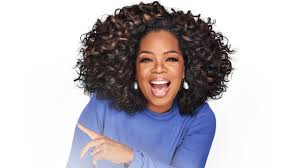

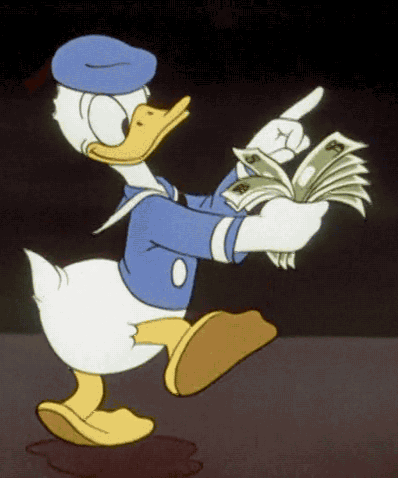

This dataset contains 4 columns and 1547 rows (number of rows will be increased each year). As of 2020, the dataset covers a span of 15 years of celebrity earnings since 2005

In [ ]:
df = pd.read_csv("/kaggle/input/forbes-celebrity-100-since-2005/forbes_celebrity_100.csv")

let's pick in the data

In [ ]:
df.head()

find out if it clean

In [ ]:
df.info()

very clean data.

always make sure the data is clean or talking in the same language

there are 1547 view point in the data and all of them are non-null.

keep an eye out on the dtype of the variables they might make you a hard life when you will manipulate the data




In [ ]:
df.index

i wish the index of the data was just the name of the celeb

lets make reset the index.

In [ ]:
df= df.set_index("Name")

lets see if this work

In [ ]:
df.head()

# great!!!

who are the most 10 paid celebrities

In [ ]:
biggest_ten_celeb = df["Pay (USD millions)"].nlargest(10)

In [ ]:
biggest_ten_celeb

the easy is to plot this in plot bar

In [ ]:
biggest_ten_celeb.plot(kind="bar",colormap='Paired')

this kind of the data cant provide us alot of info so we need to group by try with Category

In [ ]:
df_grup_by_Category = df.groupby(["Category","Name"])["Pay (USD millions)"].mean()

In [ ]:
df_grup_by_Category

ok now we have the Category and the name as a group by that is useful

we want again to find out who are the 10 most richest celeb but now its with  there category

In [ ]:
df_grup_by_Category.nlargest(10)

In [ ]:
df_grup_by_Category.nlargest(10).plot(kind="bar")


maybe it will be better to add the year as groupby

In [ ]:
df_grup_by_Category_year = df.groupby(["Year","Category","Name"])["Pay (USD millions)"].mean()

In [ ]:
df_grup_by_Category_year.nlargest(10)

In [ ]:
df_grup_by_Category_year.nlargest(10).plot(kind="bar",color="g")

check correlation with method of spearman 

In [ ]:
spearmanr(df["Category"],df["Pay (USD millions)"])

In [ ]:
spearmanr(df["Year"],df["Pay (USD millions)"])

check who are the poorest celeb

In [ ]:
df_grup_by_Category_year.tail(10).plot(kind="bar",color="g")

In [ ]:
df.Category.unique()

to predict if catgoriel we need to transform them to dummy variable

In [ ]:
df_with_dummy_var = pd.get_dummies(df, columns=['Category'])

In [ ]:
df_with_dummy_var.head()

In [ ]:
X = df_with_dummy_var[["Pay (USD millions)","Year"]]
y = df_with_dummy_var['Category_Actors']
y.value_counts()
       

* split the data to train and test with train_test_split we cut 0.25 and keep it to test
*  random_state its for keep the same sample all the time

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train, y_train)


In [ ]:
predictions  = log_reg.predict(X_test)


In [ ]:
print(classification_report(y_test,predictions))


In [ ]:
score = log_reg.score(X_test, y_test)
print(score)

WOWWW if we know what is the year and what yoy get paid we know if you are acters Our accuracy was 89.9%.